# 查看 Imitate data.npz 文件

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imitate_data = np.load("./RL/2025-09-15_10-40-03/data.npz")
print(imitate_data.keys())
print(imitate_data['goals'].shape)

KeysView(NpzFile './RL/2025-09-15_10-40-03/data.npz' with keys: goals, rewards)
(405504, 9)


In [3]:
imitate_data['goals'][2048*50]

# Goals
# Vx Vy Vz Wx Wy Wz Gx Gy Gz

array([ 0.6862139 ,  0.03355805,  0.35198578,  0.15182894, -0.20682216,
       -0.04260869, -0.00501577, -0.02188437, -1.0402449 ], dtype=float32)

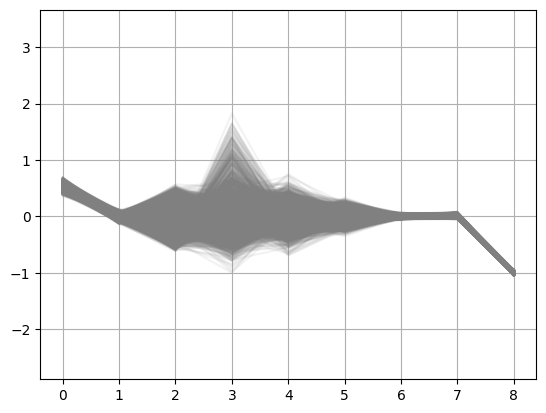

In [4]:
x = range(0,9)
goals = imitate_data['goals']


plt.figure()
for i in range(goals.shape[0] - 2000, goals.shape[0]):
    plt.plot(x, goals[i], color='gray', alpha=0.1)
plt.grid()
plt.axis('equal')
plt.show()


# 查看 data.npz + model.pt 文件

In [8]:
import numpy as np
import torch
import os
import sys

sys.path.append(os.path.join("/home/jiajun_hu/Documents/fb_hw/scripts/reinforcement_learning/fb/url_benchmark"))
sys.path.append(os.path.join("/home/jiajun_hu/Documents/fb_hw/scripts/reinforcement_learning/fb/"))

data = np.load("/home/jiajun_hu/Documents/fb_hw/exp_local/fb_ddpg/Isaac-Velocity-Flat-Unitree-Go2-Direct-Norm-v0/09-24_14-24_Pretrain_1024_test_obs_logic/09-24_15-52-56_contact_collect/data.npz")
net  = torch.load("/home/jiajun_hu/Documents/fb_hw/exp_local/fb_ddpg/Isaac-Velocity-Flat-Unitree-Go2-Direct-Norm-v0/09-24_14-24_Pretrain_1024_test_obs_logic/models/snapshot_step140000.pt", weights_only=False)

for key in data.keys():
    print(key, data[key].shape)

actions (250, 400, 12)
obs (250, 400, 45)
goals (250, 400, 9)
rewards (250, 400)
obs_raw (250, 400, 45)
goals_raw (250, 400, 9)
goals_next (250, 400, 9)
Zs_B_tensor (250, 400, 50)


In [35]:
print(net.keys())    # "agent" 参数占据了大部分储存空间

agent = net["agent"]
print(agent.act)
# print(agent.backward_net)

dict_keys(['agent', 'global_step', 'obs_normalizer'])
<bound method FBDDPGAgent.act of <url_benchmark.agent.fb_ddpg.FBDDPGAgent object at 0x7d0aa05db790>>


In [ ]:
# 文件大小打印函数
def print_size(path):
    size_bytes = os.path.getsize(path)
    size_mb = size_bytes / (1024 * 1024)
    print(f"file size = {size_mb:.2f} MB")

print_size("/home/jiajun_hu/Documents/fb_hw/exp_local/fb_ddpg/Isaac-Velocity-Flat-Unitree-Go2-Direct-Norm-v0/09-24_14-24_Pretrain_1024_test_obs_logic/models/snapshot_step140000.pt")   

file size = 117.00 MB


In [ ]:
filtered_net_model = {}
# filtered_net_model["agent"] = net["agent"]
filtered_net_model["obs_normalizer"] = net["obs_normalizer"]
filtered_net_model["act"] = net["agent"].act                    # 这个 act 函数占了 90% 的空间
filtered_net_model["Zs_B_tensor"] = data["Zs_B_tensor"]

save_path = "/home/jiajun_hu/Documents/FB_Projects/Data_Analysis/save_model_test/filtered.pt"
torch.save(filtered_net_model, save_path)

print(filtered_net_model.keys())
print_size(save_path)

dict_keys(['obs_normalizer', 'act', 'Zs_B_tensor'])
file size = 145.68 MB


# 老版本数据整合

In [47]:
import torch
import numpy as np
import os
import sys

sys.path.append(os.path.join("/home/jiajun_hu/Documents/fb_hw/scripts/reinforcement_learning/fb/url_benchmark"))
sys.path.append(os.path.join("/home/jiajun_hu/Documents/fb_hw/scripts/reinforcement_learning/fb/"))

save_path = "/home/jiajun_hu/Documents/FB_Hardware_Workspace/src/vanillarl-unitree-ros/vanillarl_unitree_python/vanillarl_unitree_python/models/go2_FB/09-24_14-24_Pretrain_1024_test_obs_logic/inference_model.pt"
net_path  = "/home/jiajun_hu/Documents/FB_Hardware_Workspace/src/vanillarl-unitree-ros/vanillarl_unitree_python/vanillarl_unitree_python/models/go2_FB/09-24_14-24_Pretrain_1024_test_obs_logic/snapshot_step140000.pt"
data_path = "/home/jiajun_hu/Documents/FB_Hardware_Workspace/src/vanillarl-unitree-ros/vanillarl_unitree_python/vanillarl_unitree_python/models/go2_FB/09-24_14-24_Pretrain_1024_test_obs_logic/data.npz"

net  = torch.load(net_path, weights_only=False)
data = np.load(data_path)

save_model={}
save_model["agent"] = net["agent"]
save_model["obs_normalizer"] = net["obs_normalizer"]
save_model["obs_raw"] = data["obs_raw"]
save_model["goals_next"] = data["goals_next"]
save_model["Zs_B_tensor"] = data["Zs_B_tensor"]

torch.save(save_model, save_path)

print(save_model.keys())
print_size(save_path)

dict_keys(['agent', 'obs_normalizer', 'obs_raw', 'goals_next', 'Zs_B_tensor'])
file size = 176.50 MB
